# Getting Started

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('cosc2789-2021/cleaned_train.csv')
validation = pd.read_csv('cosc2789-2021/cleaned_validation.csv')
test = pd.read_csv('cosc2789-2021/cleaned_test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438700 entries, 0 to 438699
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Severity                 438700 non-null  int64  
 1   Start_Lat                438700 non-null  float64
 2   Start_Lng                438700 non-null  float64
 3   End_Lat                  438700 non-null  float64
 4   End_Lng                  438700 non-null  float64
 5   Distance(mi)             438700 non-null  float64
 6   Side                     438700 non-null  object 
 7   City                     438700 non-null  object 
 8   County                   438700 non-null  object 
 9   State                    438700 non-null  object 
 10  Zipcode                  438700 non-null  object 
 11  Timezone                 438700 non-null  object 
 12  Airport_Code             438700 non-null  object 
 13  Temperature(F)           438700 non-null  float64
 14  Humi

In [3]:
data.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,...,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
0,2,39.10148,-84.52341,39.09841,-84.52241,0.219,r,cincinnati,hamilton,oh,...,day,2,2016,6,2,2016,12,2,2016,5
1,2,41.06213,-81.53784,41.06217,-81.53547,0.123,r,akron,summit,oh,...,day,2,2016,6,2,2016,12,2,2016,6
2,2,39.06324,-84.03243,39.06731,-84.05851,1.427,r,williamsburg,clermont,oh,...,day,2,2016,8,2,2016,14,2,2016,8


# Missing Values

In [4]:
print("Total missing values:", data.isna().sum().sum())
print("Total missing values:", test.isna().sum().sum())
print("Total missing values:", validation.isna().sum().sum())

Total missing values: 100
Total missing values: 31
Total missing values: 45


# Unnecessary Columns

In [5]:
# select non-numeric columns
categorical = data.select_dtypes(exclude=[np.number])
categorical = categorical.columns.tolist()
print(f'List of non numeric in train dataset is {categorical}\n\n')


# select non-numeric columns
numeric = data.select_dtypes(include=[np.number])
numeric = numeric.columns.tolist()
print(f'List of numeric in test dataset is {numeric}\n\n')

List of non numeric in train dataset is ['Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


List of numeric in test dataset is ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Timestamp_Year', 'Weather_Time_Hour']




In [6]:
# unneeded_columns = ['Side', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',  
#                     'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset', 
#                     'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

unneeded_columns = ['Side', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',  
                    'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset', 
                    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 
                    'Start_Lat', 'End_Lat', 'End_Lng', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 
                    'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Time_Hour']

data = data.drop(unneeded_columns, axis=1)
test = test.drop(unneeded_columns, axis=1)
validation = validation.drop(unneeded_columns, axis=1)

# Encoding

In [7]:
data = data.replace([True, False], [1,0])
test = test.replace([True, False], [1,0])
validation = validation.replace([True, False], [1,0])


def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

"""
List of non numeric in train dataset is ['Timezone', 'Crossing', 'Traffic_Signal']


List of numeric in test dataset is ['Severity', 'Weather_Timestamp_Year', 'Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure_bc', 'Wind_Speed_bc']
"""

data = onehot_encode(
    data,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

test = onehot_encode(
    test,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

validation = onehot_encode(
    validation,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

In [8]:
data.head(3)

,Severity,Start_Lng,Distance(mi),Humidity(%),Pressure(in),Wind_Speed(mph),Weather_Timestamp_Year,Timezone_us/central,Timezone_us/eastern,Timezone_us/mountain,Timezone_us/pacific,Crossing_0,Crossing_1,Traffic_Signal_0,Traffic_Signal_1
0,2,-84.52341,0.219,97,29.70,7.0,2016,0,1,0,0,1,0,1,0
1,2,-81.53784,0.123,55,29.65,7.0,2016,0,1,0,0,1,0,1,0
2,2,-84.03243,1.427,100,29.66,8.1,2016,0,1,0,0,1,0,0,1


### WRITING DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to a file and get that data to visualize on Dash App. Otherwise, the data will be lost when the Jupyter Lab shuts down.

In [9]:
# # To write the data from the data frame into a file, use the to_csv function.
# data.to_csv('cosc2789-2021/encoded_train.csv', index=False)
# test.to_csv('cosc2789-2021/encoded_test.csv', index=False)
# validation.to_csv('cosc2789-2021/encoded_validation.csv', index=False)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151607 entries, 0 to 151606
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      151607 non-null  object 
 1   Start_Lng               151607 non-null  float64
 2   Distance(mi)            151607 non-null  float64
 3   Humidity(%)             151607 non-null  int64  
 4   Pressure(in)            151607 non-null  float64
 5   Wind_Speed(mph)         151607 non-null  float64
 6   Weather_Timestamp_Year  151607 non-null  int64  
 7   Timezone_US/Central     151607 non-null  uint8  
 8   Timezone_US/Eastern     151607 non-null  uint8  
 9   Timezone_US/Mountain    151607 non-null  uint8  
 10  Timezone_US/Pacific     151607 non-null  uint8  
 11  Crossing_0              151607 non-null  uint8  
 12  Crossing_1              151607 non-null  uint8  
 13  Traffic_Signal_0        151607 non-null  uint8  
 14  Traffic_Signal_1    

# Splitting/Scaling

# 📈 Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

## X and y arrays

## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
X = data.drop(['Severity'], axis = 1)
y = data['Severity']

X_train = X
y_train = y

accident_ID = test.ID.to_list()
TEST = test.drop(['ID'], axis = 1)

X_test = validation.drop(['Severity'], axis = 1)
y_test = validation['Severity']

# 📦 Preparing Data For Multiple Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [12]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
TEST = pipeline.fit_transform(TEST)

CPU times: user 124 ms, sys: 36 ms, total: 160 ms
Wall time: 160 ms


## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> - **Residuals** (R2):

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** is independent of each other, independent of x, normally distributed, common variance, have 0 mean

> All of these are **loss functions**, because we want to minimize them.

In [13]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# ✔️ Linear Regression

In [14]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

CPU times: user 576 ms, sys: 30.8 ms, total: 606 ms
Wall time: 134 ms


LinearRegression(normalize=True)

## ✔️ Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [15]:
# print the intercept
print(lin_reg.intercept_)

2.2436152268064813


In [16]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Start_Lng,0.097434
Distance(mi),0.077578
Humidity(%),0.014195
Pressure(in),-0.008437
Wind_Speed(mph),0.004347
Weather_Timestamp_Year,-0.132636
Timezone_us/central,0.016757
Timezone_us/eastern,-0.009869
Timezone_us/mountain,0.015907
Timezone_us/pacific,-0.011300


> Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Distance(mi)** is associated with an **increase of \0.087860**.
- Holding all other features fixed, a 1 unit increase in **Temperature(F)** is associated with an **decrease of \-0.014064**.

## ✔️ Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [17]:
%%time

pred = lin_reg.predict(X_test)

CPU times: user 22.9 ms, sys: 5.16 ms, total: 28 ms
Wall time: 2.87 ms


In [18]:
# import hvplot.pandas

# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

**Residual Histogram**

In [19]:
# pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

In [20]:
%%time

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38924215539652685
MSE: 0.33264771622254435
RMSE: 0.5767562017200546
R2 Square 0.10585651365312154
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3915014139432668
MSE: 0.3346944908173718
RMSE: 0.5785278652038913
R2 Square 0.10676120822475399
__________________________________
CPU times: user 196 ms, sys: 11.6 ms, total: 207 ms
Wall time: 21 ms


In [21]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365


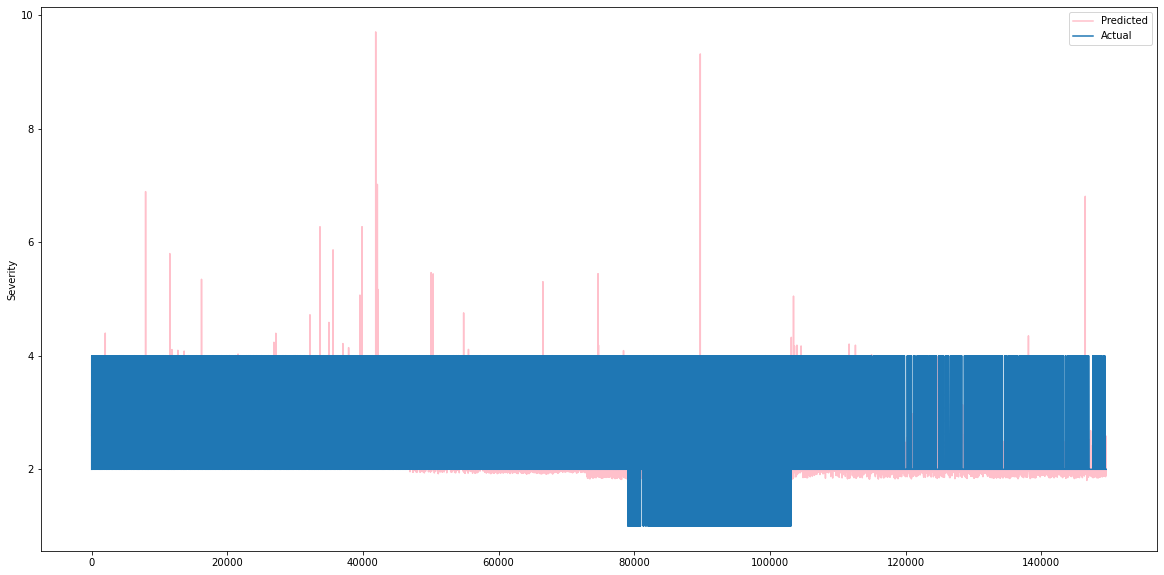

In [22]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [23]:
%%time

y_predict_model_lin_reg = lin_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_model_lin_reg})

output.to_csv('submission_lin_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 1.95 s, sys: 62.9 ms, total: 2.01 s
Wall time: 247 ms


# Regularization Techniques

* Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following are the regularization algorithms.

#### Pros of Regularization

--> We can use a regularized model to reduce the dimensionality of the training dataset. Dimensionality reduction is important because of three main reasons:

--> Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).

--> Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.

--> Computational Efficiency: A model trained on a lower dimensional dataset is computationally efficient (execution of algorithm requires less computational time).


#### Cons of Regularization

--> Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high bias errror.

--> If regularization is performed before training the model, a perfect balance between bias-variance tradeoff must be used.


# ✔️ Ridge Regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.

In [24]:
%%time

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38924229234768715
MSE: 0.3326473322269612
RMSE: 0.5767558688274972
R2 Square 0.10585754581757867
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3915016867413131
MSE: 0.334694503656912
RMSE: 0.5785278763006256
R2 Square 0.10676117395835383
__________________________________
CPU times: user 300 ms, sys: 8.39 ms, total: 309 ms
Wall time: 48.1 ms


In [25]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364


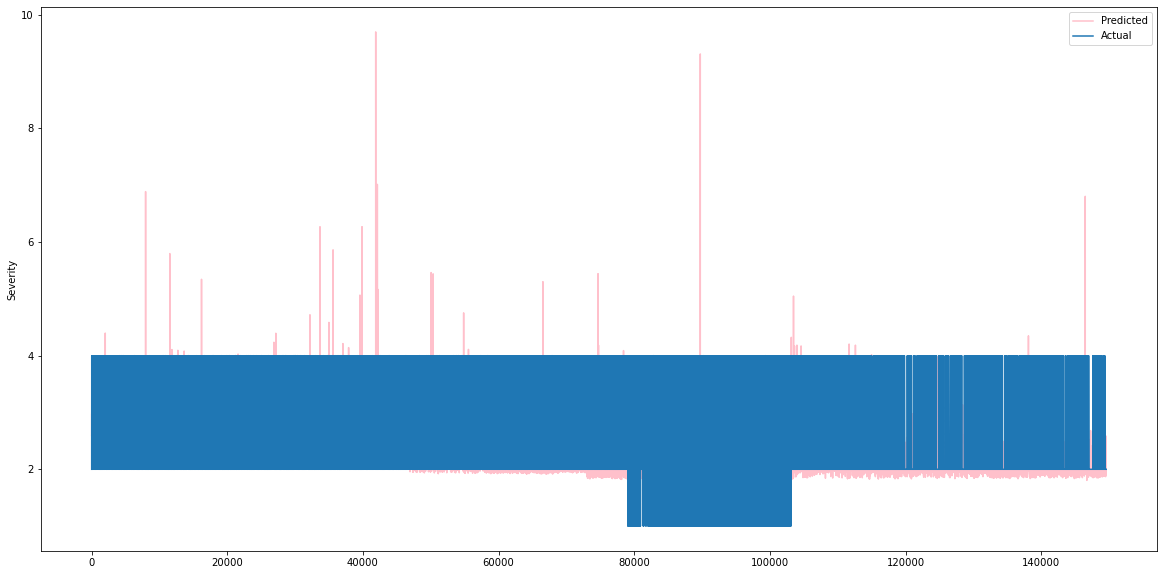

In [26]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [27]:
%%time

y_predict_Ridge = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Ridge})

output.to_csv('submission_Ridge.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 1.96 s, sys: 65.8 ms, total: 2.02 s
Wall time: 261 ms


# ✔️ LASSO Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.


In [28]:
%%time

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4301567860780011
MSE: 0.36931402864572954
RMSE: 0.6077121264593373
R2 Square 0.007298962157360589
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.43198133503271285
MSE: 0.3719710178771606
RMSE: 0.6098942677851306
R2 Square 0.007276929558716283
__________________________________
CPU times: user 307 ms, sys: 12.3 ms, total: 320 ms
Wall time: 51.1 ms


In [29]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343


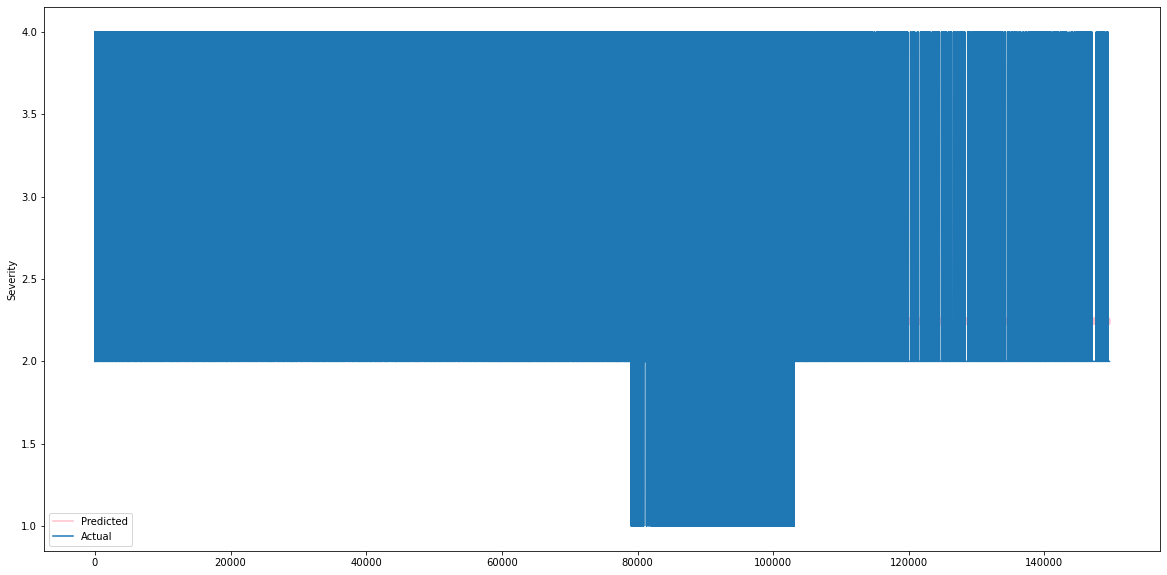

In [30]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [31]:
%%time

y_predict_Lasso = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Lasso})

output.to_csv('submission_lasso.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2 s, sys: 34.1 ms, total: 2.03 s
Wall time: 252 ms


# ✔️ Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer. 

> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

#### Pros
--> Doesn’t have the problem of selecting more than n predictors when n<<p, whereas LASSO saturates when n<<p.

#### Cons
--> Computationally more expensive than LASSO or Ridge.

In [32]:
%%time 

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4188488488511532
MSE: 0.35536083994218415
RMSE: 0.5961214976346552
R2 Square 0.044804563983580015
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4210181418015588
MSE: 0.357933800569773
RMSE: 0.5982756894357091
R2 Square 0.04473971239961849
__________________________________
CPU times: user 652 ms, sys: 14.9 ms, total: 667 ms
Wall time: 98.5 ms


In [33]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694


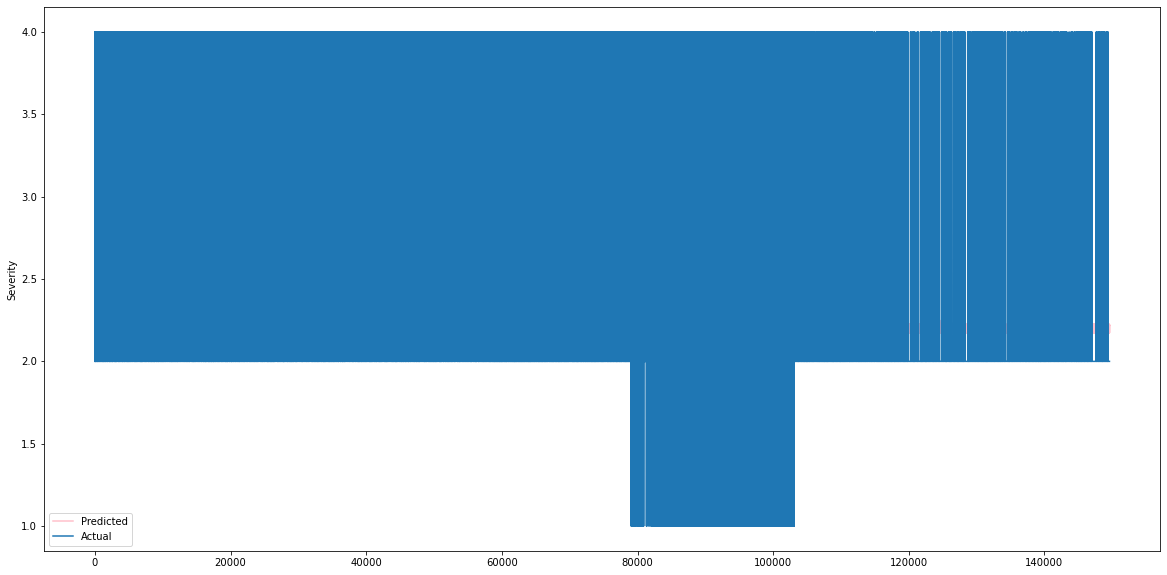

In [34]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [35]:
%%time

y_predict_ElasticNet = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_ElasticNet})

output.to_csv('submission_ElasticNet.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2 s, sys: 29.7 ms, total: 2.03 s
Wall time: 240 ms


# ✔️ Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

In [36]:
%%time

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)
TEST_2d = poly_reg.fit_transform(TEST)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3773043805247707
MSE: 0.31373333823391025
RMSE: 0.5601190393424511
R2 Square 0.1566975898188918
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.37973704963929295
MSE: 0.31530457106802945
RMSE: 0.5615198759331939
R2 Square 0.1585093814534918
__________________________________
CPU times: user 9.49 s, sys: 515 ms, total: 10 s
Wall time: 2.61 s


In [37]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000


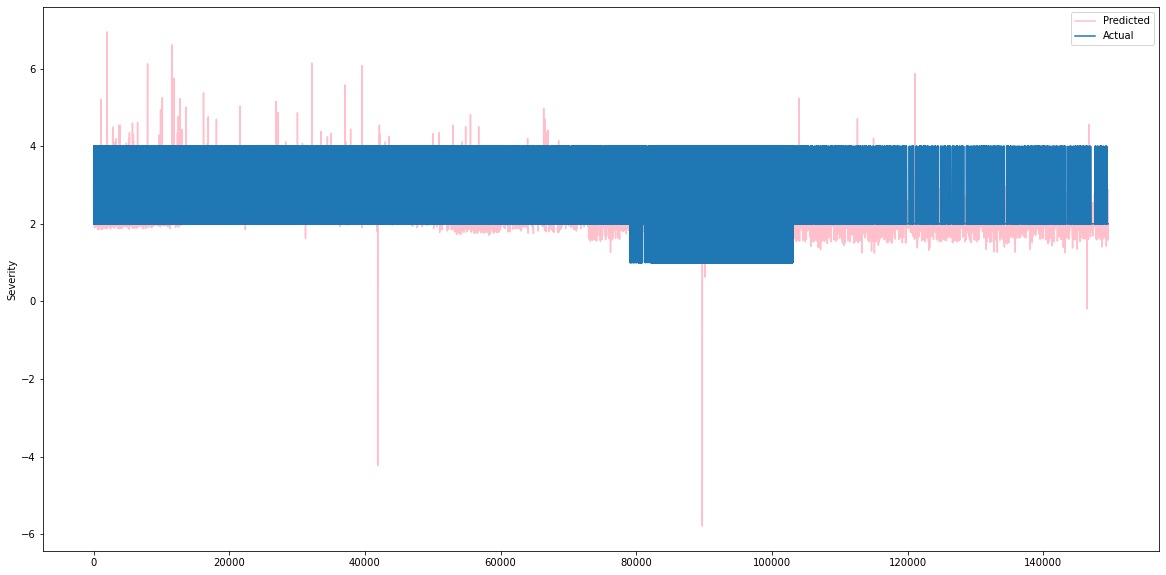

In [38]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [39]:
%%time

y_predict_poly_reg = lin_reg.predict(TEST_2d)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_poly_reg

output.to_csv('submission_poly_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2.04 s, sys: 51.3 ms, total: 2.09 s
Wall time: 280 ms


# ✔️ Stochastic Gradient Descent

> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [40]:
%%time

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38922607787677166
MSE: 0.33264789988829835
RMSE: 0.5767563609430748
R2 Square 0.10585601996706984
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.391486382745376
MSE: 0.33469467947941123
RMSE: 0.578528028257414
R2 Square 0.10676070472004529
__________________________________
CPU times: user 14.7 s, sys: 16.9 ms, total: 14.7 s
Wall time: 14.6 s


In [41]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000
5,Stochastic Gradient Descent,0.389226,0.332648,0.576756,0.105856,0.000000


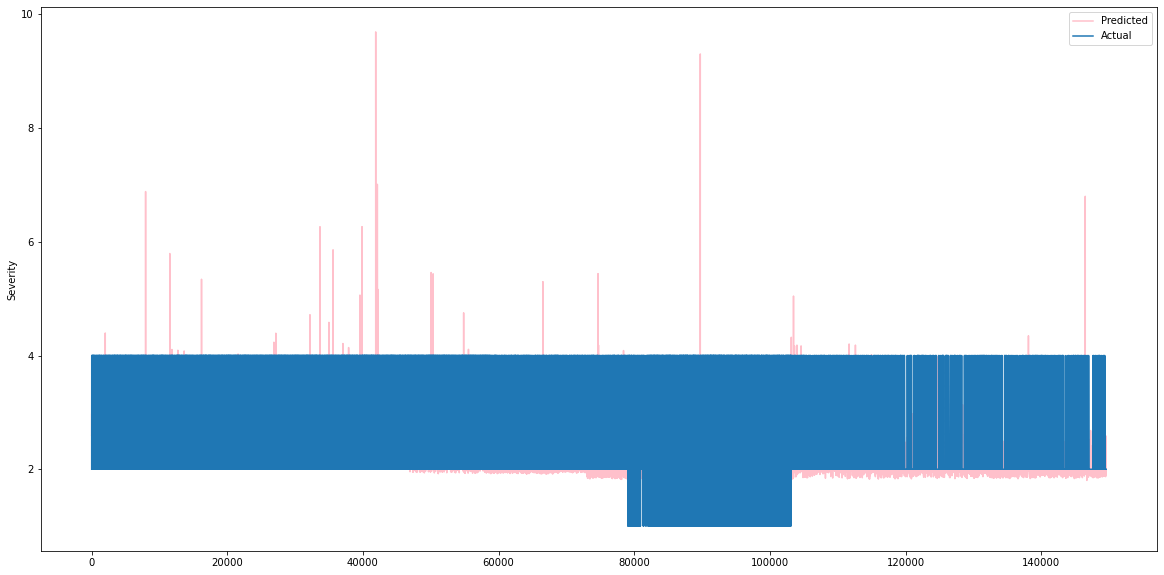

In [42]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [43]:
%%time

y_predict_poly_sgd_reg = sgd_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_poly_sgd_reg})

output.to_csv('submission_sgd_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 1.98 s, sys: 37.5 ms, total: 2.02 s
Wall time: 242 ms


# ✔️ Artficial Neural Network

In [44]:
%%time

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=20)

Defaulting to user installation because normal site-packages is not writeable
Epoch 1/20
438700/438700 [==============================] - 340s 775us/step - loss: 0.3552 - val_loss: 0.3179
Epoch 2/20
438700/438700 [==============================] - 340s 774us/step - loss: 0.3208 - val_loss: 0.3114
Epoch 3/20
438700/438700 [==============================] - 340s 774us/step - loss: 0.3154 - val_loss: 0.3085
Epoch 4/20
438700/438700 [==============================] - 341s 777us/step - loss: 0.3127 - val_loss: 0.3059
Epoch 5/20
438700/438700 [==============================] - 350s 797us/step - loss: 0.3106 - val_loss: 0.3044
Epoch 6/20
438700/438700 [==============================] - 344s 785us/step - loss: 0.3084 - val_loss: 0.3036
Epoch 7/20
438700/438700 [==============================] - 341s 778us/step - loss: 0.3073 - val_loss: 0.3046
Epoch 8/20
438700/438700 [==============================] - 354s 806us/step - loss: 0.3060 - val_loss: 0.3028
Epoch 9/20
438700/438700 [================

**---->OBSERVATION**

In [45]:
%%time

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3407164739904318
MSE: 0.3249740101392487
RMSE: 0.5700649174780437
R2 Square 0.1264831224524703
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.34154084606542384
MSE: 0.292699073026017
RMSE: 0.5410167030933676
R2 Square 0.21883934896868118
__________________________________
CPU times: user 7.85 s, sys: 1.24 s, total: 9.09 s
Wall time: 6.2 s


In [46]:
results_df_2 = pd.DataFrame(data=[["Artificial Neural Network", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000
5,Stochastic Gradient Descent,0.389226,0.332648,0.576756,0.105856,0.000000
6,Artificial Neural Network,0.340716,0.324974,0.570065,0.126483,0.000000


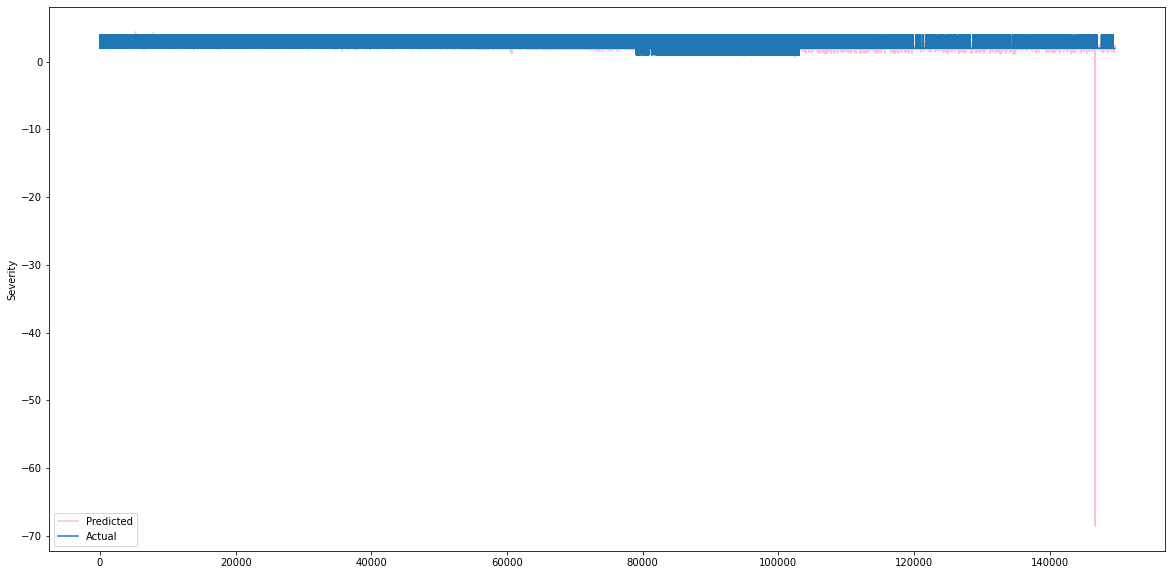

In [47]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [48]:
y_predict_model_arti = model.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_model_arti

output.to_csv('submission_arti.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# ✔️ Random Forest Regressor

In [49]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.29838817217278185
MSE: 0.24751092460469132
RMSE: 0.49750469807298436
R2 Square 0.33470073521587174
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11512124645793849
MSE: 0.03712531126445018
RMSE: 0.19267929640843662
R2 Square 0.9009192888202264
__________________________________
CPU times: user 21min 56s, sys: 6.25 s, total: 22min 2s
Wall time: 22min 2s


In [50]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000
5,Stochastic Gradient Descent,0.389226,0.332648,0.576756,0.105856,0.000000
6,Artificial Neural Network,0.340716,0.324974,0.570065,0.126483,0.000000
7,Random Forest Regressor,0.298388,0.247511,0.497505,0.334701,0.000000


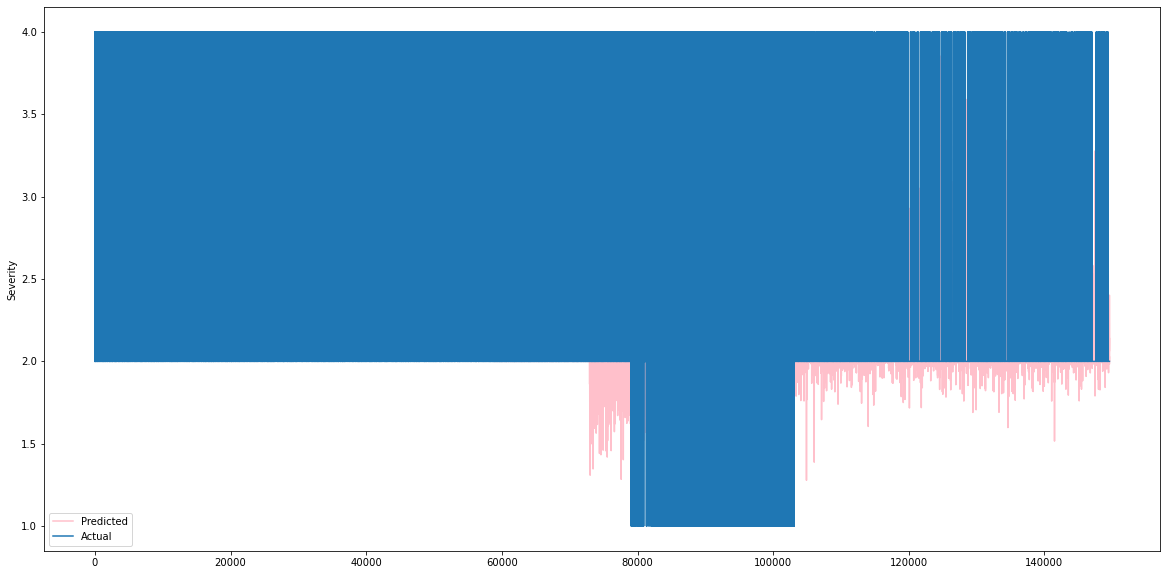

In [51]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [52]:
y_predict_rf_reg = rf_reg.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_rf_reg

output.to_csv('submission_rf_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# 📊 Models Comparison

<AxesSubplot:ylabel='Model'>

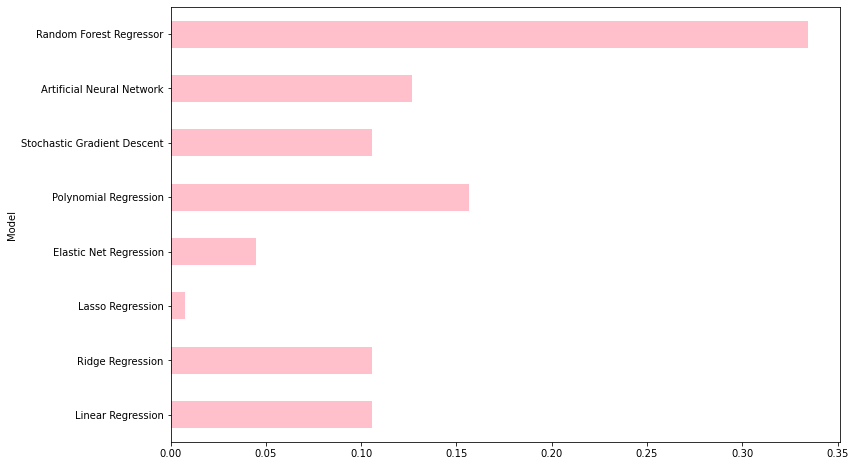

In [53]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), color='pink')

In [56]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(model, 'arti.pkl')
joblib.dump(rf_reg, 'RandomForest.pkl')

INFO:tensorflow:Assets written to: ram://c75351bf-99a0-4dfd-80f9-645d6c7bf42f/assets


['RandomForest.pkl']

# 📝 Summary
In this notebook you discovered the linear regression algorithm for machine learning.

You covered a lot of ground including:
> - The common linear regression models (Ridge, Lasso, ElasticNet, ...).
> - The representation used by the model.
> - Learning algorithms used to estimate the coefficients in the model.
> - Rules of thumb to consider when preparing data for use with linear regression.
> - How to evaluate a linear regression model.


# 🔗 References:
- [Scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)